In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import tensorflow as tf

import csv
import sklearn
from sklearn import linear_model
from scipy.io import mmread

In [2]:

#1. read the dataset
x = []
y = []
with open('data/spambase.data', 'rt') as csvfile:
	data = csv.reader(csvfile, delimiter=',')
	for raw in data:
		x.append(np.array(raw[:-1], dtype=np.float32))
		y.append(int(raw[-1]))
		
x = np.array(x)
y = np.array(y)


n_ch = x.shape[-1]

#normalize inputs
for ch in range(n_ch):
	ch_v = x[:, ch]
	norm = ch_v.max()
	x[:, ch] /= norm

print (x.shape, y.shape)

(4601, 57) (4601,)


In [49]:
#importing columns names
cols=[]
with open("data/columns.txt","r") as doc:
    lines=doc.readlines()
    for line in lines :
        cols.append(line.split(":")[0])
print(cols)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [51]:
df = pd.DataFrame(np.append(x,y.reshape(y.shape[0],1),axis = 1), columns=cols)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.003407,0.006107,0.017549,1.0
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.004639,0.010111,0.064895,1.0
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008908,0.048553,0.142605,1.0
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.003208,0.004004,0.012057,1.0
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.003208,0.004004,0.012057,1.0


In [3]:
# number of instances =  4601
# attributes: 57 float, 1 class


In [ ]:
#build a fully connected classifier network that will classify the mails

In [70]:
X = df.loc[:, df.columns!= 'class']



In [71]:
Y = df['class']


In [72]:
#train-test split
train_x = X.sample(frac=0.8)
test_x = X.loc[~X.index.isin(train_x.index)]


In [75]:
train_y = Y.sample(frac=0.8)
test_y = Y.loc[~Y.index.isin(train_y.index)]

In [79]:
dim = train_x.shape[1]
dim

57

In [164]:
dim = train_x.shape[1]
x = tf.keras.layers.Input(name = 'X', dtype =  tf.float32, shape = dim)

#1 layer: 57 inputs -> 60 outputs, relu activation
l1 = tf.keras.layers.Dense(units=60, name='L1', activation = 'relu')(x)
#layer 2: 60 inputs -> 30 output, relu activation
l2 = tf.keras.layers.Dense(units=30, name='L2', activation='relu')(l1)
#layer 3: 30 inputs -> 10 output, relu activation
l3 = tf.keras.layers.Dense(units=10, name='L3', activation='relu')(l2)
#layer 4: 10 inputs -> 1 output, softmax activation
l4 = tf.keras.layers.Dense(units=1, name='L4', activation='sigmoid')(l3)

model =  tf.keras.Model(inputs=x, outputs=l4)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00025)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['mse'])
model.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
X (InputLayer)               [(None, 57)]              0         
_________________________________________________________________
L1 (Dense)                   (None, 60)                3480      
_________________________________________________________________
L2 (Dense)                   (None, 30)                1830      
_________________________________________________________________
L3 (Dense)                   (None, 10)                310       
_________________________________________________________________
L4 (Dense)                   (None, 1)                 11        
Total params: 5,631
Trainable params: 5,631
Non-trainable params: 0
_________________________________________________________________


In [165]:
hist =  model.fit(x=train_x, y=train_y,
                  epochs=500, batch_size=30,
                  validation_data=(test_x, test_y))

Epoch 1/500
123/123 [==============================] - 0s 3ms/step - loss: 0.6859 - mse: 0.2464 - val_loss: 0.6850 - val_mse: 0.2459
Epoch 2/500
123/123 [==============================] - 0s 2ms/step - loss: 0.6733 - mse: 0.2401 - val_loss: 0.6836 - val_mse: 0.2452
Epoch 3/500
123/123 [==============================] - 0s 2ms/step - loss: 0.6690 - mse: 0.2380 - val_loss: 0.6848 - val_mse: 0.2457
Epoch 4/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6681 - mse: 0.2376 - val_loss: 0.6845 - val_mse: 0.2456
Epoch 5/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6675 - mse: 0.2373 - val_loss: 0.6828 - val_mse: 0.2448
Epoch 6/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6672 - mse: 0.2372 - val_loss: 0.6807 - val_mse: 0.2438
Epoch 7/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6666 - mse: 0.2369 - val_loss: 0.6809 - val_mse: 0.2439
Epoch 8/500
123/123 [==============================] - 0s 1ms/step - 

123/123 [==============================] - 0s 1ms/step - loss: 0.6144 - mse: 0.2134 - val_loss: 0.7009 - val_mse: 0.2511
Epoch 63/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6129 - mse: 0.2128 - val_loss: 0.6981 - val_mse: 0.2499
Epoch 64/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6122 - mse: 0.2125 - val_loss: 0.7056 - val_mse: 0.2533
Epoch 65/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6107 - mse: 0.2118 - val_loss: 0.7135 - val_mse: 0.2556
Epoch 66/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6091 - mse: 0.2112 - val_loss: 0.7089 - val_mse: 0.2537
Epoch 67/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6072 - mse: 0.2103 - val_loss: 0.7116 - val_mse: 0.2544
Epoch 68/500
123/123 [==============================] - 0s 1ms/step - loss: 0.6062 - mse: 0.2099 - val_loss: 0.7058 - val_mse: 0.2520
Epoch 69/500
123/123 [==============================] - 0s 1ms/step - loss:

123/123 [==============================] - 0s 1ms/step - loss: 0.5388 - mse: 0.1829 - val_loss: 0.7865 - val_mse: 0.2689
Epoch 124/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5377 - mse: 0.1826 - val_loss: 0.7852 - val_mse: 0.2704
Epoch 125/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5381 - mse: 0.1827 - val_loss: 0.7995 - val_mse: 0.2753
Epoch 126/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5350 - mse: 0.1813 - val_loss: 0.7950 - val_mse: 0.2741
Epoch 127/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5337 - mse: 0.1808 - val_loss: 0.7635 - val_mse: 0.2607
Epoch 128/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5330 - mse: 0.1805 - val_loss: 0.7908 - val_mse: 0.2741
Epoch 129/500
123/123 [==============================] - 0s 1ms/step - loss: 0.5332 - mse: 0.1806 - val_loss: 0.7798 - val_mse: 0.2679
Epoch 130/500
123/123 [==============================] - 0s 1ms/step 

Epoch 184/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4812 - mse: 0.1606 - val_loss: 0.8928 - val_mse: 0.2944
Epoch 185/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4807 - mse: 0.1607 - val_loss: 0.9233 - val_mse: 0.3061
Epoch 186/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4807 - mse: 0.1607 - val_loss: 0.8739 - val_mse: 0.2876
Epoch 187/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4800 - mse: 0.1601 - val_loss: 0.9059 - val_mse: 0.2932
Epoch 188/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4752 - mse: 0.1585 - val_loss: 0.8874 - val_mse: 0.2913
Epoch 189/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4749 - mse: 0.1584 - val_loss: 0.9059 - val_mse: 0.2929
Epoch 190/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4763 - mse: 0.1588 - val_loss: 0.9175 - val_mse: 0.2979
Epoch 191/500
123/123 [==============================] 

123/123 [==============================] - 0s 1ms/step - loss: 0.4405 - mse: 0.1458 - val_loss: 1.0189 - val_mse: 0.3138
Epoch 245/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4379 - mse: 0.1451 - val_loss: 1.0035 - val_mse: 0.3107
Epoch 246/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4383 - mse: 0.1451 - val_loss: 0.9866 - val_mse: 0.3088
Epoch 247/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4380 - mse: 0.1450 - val_loss: 1.0127 - val_mse: 0.3106
Epoch 248/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4374 - mse: 0.1445 - val_loss: 1.0207 - val_mse: 0.3157
Epoch 249/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4323 - mse: 0.1425 - val_loss: 0.9931 - val_mse: 0.3043
Epoch 250/500
123/123 [==============================] - 0s 2ms/step - loss: 0.4319 - mse: 0.1423 - val_loss: 0.9620 - val_mse: 0.2962
Epoch 251/500
123/123 [==============================] - 0s 2ms/step 

Epoch 305/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3990 - mse: 0.1306 - val_loss: 1.1196 - val_mse: 0.3291
Epoch 306/500
123/123 [==============================] - 0s 2ms/step - loss: 0.4017 - mse: 0.1320 - val_loss: 1.1460 - val_mse: 0.3355
Epoch 307/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4002 - mse: 0.1310 - val_loss: 1.0749 - val_mse: 0.3159
Epoch 308/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4022 - mse: 0.1321 - val_loss: 1.0724 - val_mse: 0.3081
Epoch 309/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4003 - mse: 0.1316 - val_loss: 1.1523 - val_mse: 0.3339
Epoch 310/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4019 - mse: 0.1316 - val_loss: 1.1010 - val_mse: 0.3179
Epoch 311/500
123/123 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.1326 - val_loss: 1.1364 - val_mse: 0.3304
Epoch 312/500
123/123 [==============================] 

123/123 [==============================] - 0s 2ms/step - loss: 0.3741 - mse: 0.1220 - val_loss: 1.2767 - val_mse: 0.3415
Epoch 366/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3771 - mse: 0.1233 - val_loss: 1.2914 - val_mse: 0.3578
Epoch 367/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3738 - mse: 0.1221 - val_loss: 1.2350 - val_mse: 0.3415
Epoch 368/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3772 - mse: 0.1231 - val_loss: 1.2820 - val_mse: 0.3522
Epoch 369/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3728 - mse: 0.1219 - val_loss: 1.2309 - val_mse: 0.3345
Epoch 370/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3722 - mse: 0.1218 - val_loss: 1.2727 - val_mse: 0.3485
Epoch 371/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3698 - mse: 0.1209 - val_loss: 1.1786 - val_mse: 0.3211
Epoch 372/500
123/123 [==============================] - 0s 2ms/step 

Epoch 426/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3505 - mse: 0.1141 - val_loss: 1.3363 - val_mse: 0.3470
Epoch 427/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3523 - mse: 0.1143 - val_loss: 1.3302 - val_mse: 0.3421
Epoch 428/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3483 - mse: 0.1131 - val_loss: 1.4005 - val_mse: 0.3566
Epoch 429/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3552 - mse: 0.1153 - val_loss: 1.3323 - val_mse: 0.3382
Epoch 430/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3486 - mse: 0.1132 - val_loss: 1.3117 - val_mse: 0.3336
Epoch 431/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3522 - mse: 0.1151 - val_loss: 1.3428 - val_mse: 0.3440
Epoch 432/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3470 - mse: 0.1129 - val_loss: 1.3510 - val_mse: 0.3421
Epoch 433/500
123/123 [==============================] 

123/123 [==============================] - 0s 2ms/step - loss: 0.3309 - mse: 0.1073 - val_loss: 1.5116 - val_mse: 0.3684
Epoch 487/500
123/123 [==============================] - 0s 2ms/step - loss: 0.3347 - mse: 0.1094 - val_loss: 1.5179 - val_mse: 0.3576
Epoch 488/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3300 - mse: 0.1075 - val_loss: 1.5249 - val_mse: 0.3691
Epoch 489/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3339 - mse: 0.1088 - val_loss: 1.4609 - val_mse: 0.3596
Epoch 490/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3349 - mse: 0.1091 - val_loss: 1.5167 - val_mse: 0.3631
Epoch 491/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3312 - mse: 0.1076 - val_loss: 1.4674 - val_mse: 0.3557
Epoch 492/500
123/123 [==============================] - 0s 1ms/step - loss: 0.3309 - mse: 0.1077 - val_loss: 1.4292 - val_mse: 0.3401
Epoch 493/500
123/123 [==============================] - 0s 1ms/step 

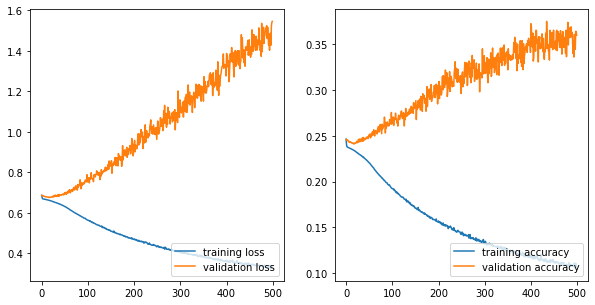

In [168]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['mse'])
axs[1].plot(hist.epoch, hist.history['val_mse'])
axs[1].legend(('training accuracy','validation accuracy'), loc='lower right')
plt.show()

In [190]:
dim = train_x.shape[1]
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(dim),
  tf.keras.layers.Dense(int(dim*4), activation='relu'),
  tf.keras.layers.Dense(int(dim*3.5), activation='relu'),
  tf.keras.layers.Dense(int(dim*3.25), activation='relu'),
  tf.keras.layers.Dense(int(dim*2.5), activation='relu'),
  tf.keras.layers.Dense(int(dim*2), activation='relu'),
  tf.keras.layers.Dense(int(dim*1.25), activation='relu'),
  tf.keras.layers.Dense(int(dim*.5), activation='relu'),
  tf.keras.layers.Dense(int(dim*0.25), activation='relu'),
  tf.keras.layers.Dense(int(dim*0.125), activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse','accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 228)               13224     
_________________________________________________________________
dense_137 (Dense)            (None, 199)               45571     
_________________________________________________________________
dense_138 (Dense)            (None, 185)               37000     
_________________________________________________________________
dense_139 (Dense)            (None, 142)               26412     
_________________________________________________________________
dense_140 (Dense)            (None, 114)               16302     
_________________________________________________________________
dense_141 (Dense)            (None, 71)                8165      
_________________________________________________________________
dense_142 (Dense)            (None, 28)              

In [191]:
hist =  model.fit(x=train_x, y=train_y,
                  epochs=1000, batch_size=25,
                  validation_data=(test_x, test_y))

Epoch 1/1000
148/148 [==============================] - 1s 5ms/step - loss: 0.6920 - mse: 0.2494 - accuracy: 0.6066 - val_loss: 0.6913 - val_mse: 0.2491 - val_accuracy: 0.5891
Epoch 2/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.6843 - mse: 0.2456 - accuracy: 0.6102 - val_loss: 0.6877 - val_mse: 0.2471 - val_accuracy: 0.5891
Epoch 3/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.6692 - mse: 0.2381 - accuracy: 0.6102 - val_loss: 0.6850 - val_mse: 0.2459 - val_accuracy: 0.5891
Epoch 4/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.6688 - mse: 0.2379 - accuracy: 0.6102 - val_loss: 0.6859 - val_mse: 0.2462 - val_accuracy: 0.5891
Epoch 5/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.6676 - mse: 0.2374 - accuracy: 0.6102 - val_loss: 0.6833 - val_mse: 0.2450 - val_accuracy: 0.5891
Epoch 6/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.6672 - mse: 0.2372 - accuracy: 0.6102 - va

148/148 [==============================] - 0s 3ms/step - loss: 0.5094 - mse: 0.1689 - accuracy: 0.7544 - val_loss: 0.8417 - val_mse: 0.2972 - val_accuracy: 0.5609
Epoch 48/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.5023 - mse: 0.1659 - accuracy: 0.7642 - val_loss: 0.9162 - val_mse: 0.3272 - val_accuracy: 0.4924
Epoch 49/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.5056 - mse: 0.1674 - accuracy: 0.7574 - val_loss: 0.8966 - val_mse: 0.3189 - val_accuracy: 0.5152
Epoch 50/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.4905 - mse: 0.1614 - accuracy: 0.7732 - val_loss: 0.8923 - val_mse: 0.3137 - val_accuracy: 0.5163
Epoch 51/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.4868 - mse: 0.1601 - accuracy: 0.7650 - val_loss: 0.8865 - val_mse: 0.3097 - val_accuracy: 0.5337
Epoch 52/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.4812 - mse: 0.1578 - accuracy: 0.7715 - val_loss: 

148/148 [==============================] - 0s 3ms/step - loss: 0.3655 - mse: 0.1167 - accuracy: 0.8362 - val_loss: 1.1634 - val_mse: 0.3530 - val_accuracy: 0.5402
Epoch 94/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.3748 - mse: 0.1202 - accuracy: 0.8275 - val_loss: 1.1520 - val_mse: 0.3448 - val_accuracy: 0.5467
Epoch 95/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.3614 - mse: 0.1144 - accuracy: 0.8413 - val_loss: 1.3783 - val_mse: 0.3888 - val_accuracy: 0.4837
Epoch 96/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.3530 - mse: 0.1117 - accuracy: 0.8441 - val_loss: 1.3248 - val_mse: 0.3795 - val_accuracy: 0.5109
Epoch 97/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.3516 - mse: 0.1113 - accuracy: 0.8443 - val_loss: 1.1931 - val_mse: 0.3481 - val_accuracy: 0.5576
Epoch 98/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.3503 - mse: 0.1111 - accuracy: 0.8460 - val_loss: 

148/148 [==============================] - 1s 4ms/step - loss: 0.3016 - mse: 0.0956 - accuracy: 0.8574 - val_loss: 1.4939 - val_mse: 0.3601 - val_accuracy: 0.5435
Epoch 140/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2857 - mse: 0.0901 - accuracy: 0.8696 - val_loss: 1.6597 - val_mse: 0.3871 - val_accuracy: 0.5217
Epoch 141/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2887 - mse: 0.0919 - accuracy: 0.8655 - val_loss: 1.4784 - val_mse: 0.3789 - val_accuracy: 0.5435
Epoch 142/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2909 - mse: 0.0927 - accuracy: 0.8642 - val_loss: 1.5300 - val_mse: 0.3842 - val_accuracy: 0.5370
Epoch 143/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2789 - mse: 0.0889 - accuracy: 0.8701 - val_loss: 1.7038 - val_mse: 0.3955 - val_accuracy: 0.5293
Epoch 144/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2819 - mse: 0.0899 - accuracy: 0.8669 - val_l

148/148 [==============================] - 1s 6ms/step - loss: 0.2462 - mse: 0.0793 - accuracy: 0.8824 - val_loss: 1.8732 - val_mse: 0.4042 - val_accuracy: 0.5098
Epoch 186/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2595 - mse: 0.0835 - accuracy: 0.8758 - val_loss: 1.9404 - val_mse: 0.4145 - val_accuracy: 0.4913
Epoch 187/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2469 - mse: 0.0799 - accuracy: 0.8783 - val_loss: 1.6781 - val_mse: 0.3679 - val_accuracy: 0.5587
Epoch 188/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2456 - mse: 0.0798 - accuracy: 0.8764 - val_loss: 1.8131 - val_mse: 0.3848 - val_accuracy: 0.5120
Epoch 189/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2481 - mse: 0.0805 - accuracy: 0.8758 - val_loss: 2.0659 - val_mse: 0.4064 - val_accuracy: 0.5217
Epoch 190/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.2477 - mse: 0.0800 - accuracy: 0.8737 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.2257 - mse: 0.0737 - accuracy: 0.8856 - val_loss: 1.9732 - val_mse: 0.3955 - val_accuracy: 0.5413
Epoch 232/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2192 - mse: 0.0715 - accuracy: 0.8886 - val_loss: 1.7858 - val_mse: 0.3744 - val_accuracy: 0.5587
Epoch 233/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2182 - mse: 0.0710 - accuracy: 0.8905 - val_loss: 1.9613 - val_mse: 0.4007 - val_accuracy: 0.5239
Epoch 234/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2213 - mse: 0.0726 - accuracy: 0.8886 - val_loss: 2.1193 - val_mse: 0.4186 - val_accuracy: 0.5163
Epoch 235/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2282 - mse: 0.0750 - accuracy: 0.8840 - val_loss: 1.9238 - val_mse: 0.3813 - val_accuracy: 0.5402
Epoch 236/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2186 - mse: 0.0718 - accuracy: 0.8902 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.2131 - mse: 0.0697 - accuracy: 0.8927 - val_loss: 2.1221 - val_mse: 0.3816 - val_accuracy: 0.5435
Epoch 278/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2089 - mse: 0.0698 - accuracy: 0.8883 - val_loss: 2.1503 - val_mse: 0.3910 - val_accuracy: 0.5239
Epoch 279/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2093 - mse: 0.0703 - accuracy: 0.8875 - val_loss: 2.1412 - val_mse: 0.3968 - val_accuracy: 0.5130
Epoch 280/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2253 - mse: 0.0741 - accuracy: 0.8829 - val_loss: 2.1924 - val_mse: 0.4009 - val_accuracy: 0.5337
Epoch 281/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2119 - mse: 0.0711 - accuracy: 0.8851 - val_loss: 2.0274 - val_mse: 0.3868 - val_accuracy: 0.5370
Epoch 282/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.2057 - mse: 0.0693 - accuracy: 0.8851 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1954 - mse: 0.0658 - accuracy: 0.8981 - val_loss: 2.5733 - val_mse: 0.4142 - val_accuracy: 0.5217
Epoch 324/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.2043 - mse: 0.0681 - accuracy: 0.8911 - val_loss: 2.4720 - val_mse: 0.4019 - val_accuracy: 0.5250
Epoch 325/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1967 - mse: 0.0657 - accuracy: 0.8927 - val_loss: 2.2852 - val_mse: 0.3917 - val_accuracy: 0.5370
Epoch 326/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1918 - mse: 0.0646 - accuracy: 0.8968 - val_loss: 2.5015 - val_mse: 0.3997 - val_accuracy: 0.5283
Epoch 327/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1963 - mse: 0.0658 - accuracy: 0.8943 - val_loss: 2.3630 - val_mse: 0.4067 - val_accuracy: 0.5174
Epoch 328/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1986 - mse: 0.0669 - accuracy: 0.8916 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1883 - mse: 0.0642 - accuracy: 0.8954 - val_loss: 2.5476 - val_mse: 0.3868 - val_accuracy: 0.5576
Epoch 370/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1877 - mse: 0.0637 - accuracy: 0.8943 - val_loss: 2.8994 - val_mse: 0.4178 - val_accuracy: 0.5152
Epoch 371/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1857 - mse: 0.0632 - accuracy: 0.8962 - val_loss: 2.6991 - val_mse: 0.4073 - val_accuracy: 0.5326
Epoch 372/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1860 - mse: 0.0623 - accuracy: 0.8992 - val_loss: 2.7676 - val_mse: 0.4094 - val_accuracy: 0.5272
Epoch 373/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1867 - mse: 0.0636 - accuracy: 0.8960 - val_loss: 2.7070 - val_mse: 0.3969 - val_accuracy: 0.5380
Epoch 374/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1920 - mse: 0.0645 - accuracy: 0.8970 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1774 - mse: 0.0604 - accuracy: 0.8976 - val_loss: 2.7707 - val_mse: 0.3992 - val_accuracy: 0.5348
Epoch 416/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1861 - mse: 0.0631 - accuracy: 0.8981 - val_loss: 3.0665 - val_mse: 0.4192 - val_accuracy: 0.5174
Epoch 417/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1782 - mse: 0.0615 - accuracy: 0.8962 - val_loss: 2.7641 - val_mse: 0.4023 - val_accuracy: 0.5163
Epoch 418/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1837 - mse: 0.0630 - accuracy: 0.8960 - val_loss: 2.8175 - val_mse: 0.4041 - val_accuracy: 0.5207
Epoch 419/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1966 - mse: 0.0660 - accuracy: 0.8951 - val_loss: 2.8904 - val_mse: 0.4204 - val_accuracy: 0.5043
Epoch 420/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1991 - mse: 0.0665 - accuracy: 0.8962 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1969 - mse: 0.0655 - accuracy: 0.8919 - val_loss: 2.3862 - val_mse: 0.3862 - val_accuracy: 0.5337
Epoch 462/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1948 - mse: 0.0662 - accuracy: 0.8913 - val_loss: 3.0839 - val_mse: 0.4193 - val_accuracy: 0.5152
Epoch 463/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1753 - mse: 0.0602 - accuracy: 0.9041 - val_loss: 2.8846 - val_mse: 0.4068 - val_accuracy: 0.5228
Epoch 464/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1867 - mse: 0.0628 - accuracy: 0.8973 - val_loss: 3.2139 - val_mse: 0.4338 - val_accuracy: 0.5022
Epoch 465/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1694 - mse: 0.0584 - accuracy: 0.9055 - val_loss: 2.8746 - val_mse: 0.4139 - val_accuracy: 0.5120
Epoch 466/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1758 - mse: 0.0600 - accuracy: 0.9019 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1746 - mse: 0.0595 - accuracy: 0.9027 - val_loss: 2.9715 - val_mse: 0.4092 - val_accuracy: 0.5217
Epoch 508/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1825 - mse: 0.0610 - accuracy: 0.8979 - val_loss: 3.1318 - val_mse: 0.4192 - val_accuracy: 0.5196
Epoch 509/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1707 - mse: 0.0587 - accuracy: 0.9003 - val_loss: 3.2793 - val_mse: 0.4266 - val_accuracy: 0.5315
Epoch 510/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1710 - mse: 0.0591 - accuracy: 0.9017 - val_loss: 3.1862 - val_mse: 0.4142 - val_accuracy: 0.5370
Epoch 511/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1720 - mse: 0.0592 - accuracy: 0.8989 - val_loss: 3.2055 - val_mse: 0.4098 - val_accuracy: 0.5283
Epoch 512/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1732 - mse: 0.0596 - accuracy: 0.9030 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1799 - mse: 0.0611 - accuracy: 0.8957 - val_loss: 2.8913 - val_mse: 0.3919 - val_accuracy: 0.5446
Epoch 554/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1729 - mse: 0.0592 - accuracy: 0.9014 - val_loss: 3.3629 - val_mse: 0.4234 - val_accuracy: 0.5250
Epoch 555/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1637 - mse: 0.0567 - accuracy: 0.9041 - val_loss: 3.4201 - val_mse: 0.4300 - val_accuracy: 0.5185
Epoch 556/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1638 - mse: 0.0567 - accuracy: 0.9084 - val_loss: 3.2619 - val_mse: 0.4120 - val_accuracy: 0.5293
Epoch 557/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1709 - mse: 0.0584 - accuracy: 0.9052 - val_loss: 3.3241 - val_mse: 0.4109 - val_accuracy: 0.5326
Epoch 558/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1789 - mse: 0.0609 - accuracy: 0.9022 - val_l

148/148 [==============================] - 1s 4ms/step - loss: 0.1775 - mse: 0.0610 - accuracy: 0.9006 - val_loss: 3.3544 - val_mse: 0.4088 - val_accuracy: 0.5359
Epoch 600/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1686 - mse: 0.0584 - accuracy: 0.9014 - val_loss: 3.2213 - val_mse: 0.4332 - val_accuracy: 0.5065
Epoch 601/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1995 - mse: 0.0667 - accuracy: 0.8900 - val_loss: 3.5230 - val_mse: 0.4335 - val_accuracy: 0.5076
Epoch 602/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1674 - mse: 0.0570 - accuracy: 0.9065 - val_loss: 2.9836 - val_mse: 0.4078 - val_accuracy: 0.5293
Epoch 603/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1697 - mse: 0.0581 - accuracy: 0.9033 - val_loss: 3.2076 - val_mse: 0.4016 - val_accuracy: 0.5435
Epoch 604/1000
148/148 [==============================] - 1s 5ms/step - loss: 0.1712 - mse: 0.0581 - accuracy: 0.9027 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1845 - mse: 0.0627 - accuracy: 0.8957 - val_loss: 3.0409 - val_mse: 0.4313 - val_accuracy: 0.5033
Epoch 646/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1804 - mse: 0.0603 - accuracy: 0.9036 - val_loss: 3.2230 - val_mse: 0.4055 - val_accuracy: 0.5370
Epoch 647/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1631 - mse: 0.0564 - accuracy: 0.9052 - val_loss: 3.3391 - val_mse: 0.4143 - val_accuracy: 0.5370
Epoch 648/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1591 - mse: 0.0545 - accuracy: 0.9093 - val_loss: 3.9060 - val_mse: 0.4520 - val_accuracy: 0.5141
Epoch 649/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1622 - mse: 0.0559 - accuracy: 0.9095 - val_loss: 3.3547 - val_mse: 0.4212 - val_accuracy: 0.5207
Epoch 650/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1590 - mse: 0.0553 - accuracy: 0.9082 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1637 - mse: 0.0565 - accuracy: 0.9057 - val_loss: 3.3061 - val_mse: 0.4144 - val_accuracy: 0.5293
Epoch 692/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1573 - mse: 0.0546 - accuracy: 0.9082 - val_loss: 3.4599 - val_mse: 0.4323 - val_accuracy: 0.5130
Epoch 693/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1598 - mse: 0.0555 - accuracy: 0.9095 - val_loss: 3.4585 - val_mse: 0.4266 - val_accuracy: 0.5196
Epoch 694/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1683 - mse: 0.0571 - accuracy: 0.9068 - val_loss: 3.5237 - val_mse: 0.4400 - val_accuracy: 0.5130
Epoch 695/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1692 - mse: 0.0568 - accuracy: 0.9049 - val_loss: 3.3220 - val_mse: 0.3959 - val_accuracy: 0.5576
Epoch 696/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1680 - mse: 0.0574 - accuracy: 0.9095 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1697 - mse: 0.0582 - accuracy: 0.9017 - val_loss: 3.3874 - val_mse: 0.4031 - val_accuracy: 0.5478
Epoch 738/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1739 - mse: 0.0599 - accuracy: 0.9000 - val_loss: 3.3049 - val_mse: 0.4111 - val_accuracy: 0.5348
Epoch 739/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1601 - mse: 0.0557 - accuracy: 0.9071 - val_loss: 3.7228 - val_mse: 0.4407 - val_accuracy: 0.5185
Epoch 740/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1688 - mse: 0.0581 - accuracy: 0.9052 - val_loss: 3.1403 - val_mse: 0.4102 - val_accuracy: 0.5337
Epoch 741/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1624 - mse: 0.0565 - accuracy: 0.9041 - val_loss: 3.5262 - val_mse: 0.4388 - val_accuracy: 0.5087
Epoch 742/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1638 - mse: 0.0568 - accuracy: 0.9046 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1579 - mse: 0.0546 - accuracy: 0.9109 - val_loss: 3.1802 - val_mse: 0.4233 - val_accuracy: 0.5185
Epoch 784/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1560 - mse: 0.0542 - accuracy: 0.9079 - val_loss: 3.3854 - val_mse: 0.4226 - val_accuracy: 0.5293
Epoch 785/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1540 - mse: 0.0531 - accuracy: 0.9112 - val_loss: 3.5995 - val_mse: 0.4401 - val_accuracy: 0.5120
Epoch 786/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1581 - mse: 0.0549 - accuracy: 0.9084 - val_loss: 3.4528 - val_mse: 0.4294 - val_accuracy: 0.5228
Epoch 787/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1585 - mse: 0.0550 - accuracy: 0.9084 - val_loss: 3.4245 - val_mse: 0.4111 - val_accuracy: 0.5380
Epoch 788/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1725 - mse: 0.0579 - accuracy: 0.9060 - val_l

148/148 [==============================] - 1s 4ms/step - loss: 0.1528 - mse: 0.0531 - accuracy: 0.9120 - val_loss: 3.7660 - val_mse: 0.4337 - val_accuracy: 0.5283
Epoch 830/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1622 - mse: 0.0561 - accuracy: 0.9074 - val_loss: 3.5505 - val_mse: 0.4348 - val_accuracy: 0.5130
Epoch 831/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1576 - mse: 0.0542 - accuracy: 0.9101 - val_loss: 3.5830 - val_mse: 0.4118 - val_accuracy: 0.5402
Epoch 832/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.2095 - mse: 0.0674 - accuracy: 0.8962 - val_loss: 2.9263 - val_mse: 0.3984 - val_accuracy: 0.5467
Epoch 833/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1607 - mse: 0.0550 - accuracy: 0.9117 - val_loss: 3.4715 - val_mse: 0.4011 - val_accuracy: 0.5674
Epoch 834/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1582 - mse: 0.0545 - accuracy: 0.9087 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1558 - mse: 0.0537 - accuracy: 0.9101 - val_loss: 3.3663 - val_mse: 0.4295 - val_accuracy: 0.5163
Epoch 876/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1566 - mse: 0.0534 - accuracy: 0.9120 - val_loss: 3.6017 - val_mse: 0.4432 - val_accuracy: 0.4978
Epoch 877/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1905 - mse: 0.0633 - accuracy: 0.8998 - val_loss: 3.2640 - val_mse: 0.4153 - val_accuracy: 0.5413
Epoch 878/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1571 - mse: 0.0546 - accuracy: 0.9063 - val_loss: 3.4233 - val_mse: 0.4300 - val_accuracy: 0.5261
Epoch 879/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1505 - mse: 0.0525 - accuracy: 0.9093 - val_loss: 3.2588 - val_mse: 0.4066 - val_accuracy: 0.5467
Epoch 880/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1497 - mse: 0.0520 - accuracy: 0.9128 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1693 - mse: 0.0571 - accuracy: 0.9082 - val_loss: 3.3473 - val_mse: 0.4042 - val_accuracy: 0.5533
Epoch 922/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1598 - mse: 0.0548 - accuracy: 0.9093 - val_loss: 3.4571 - val_mse: 0.4370 - val_accuracy: 0.5109
Epoch 923/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1625 - mse: 0.0555 - accuracy: 0.9104 - val_loss: 3.4918 - val_mse: 0.4353 - val_accuracy: 0.5239
Epoch 924/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1593 - mse: 0.0543 - accuracy: 0.9098 - val_loss: 3.2852 - val_mse: 0.4094 - val_accuracy: 0.5348
Epoch 925/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1556 - mse: 0.0539 - accuracy: 0.9117 - val_loss: 3.2180 - val_mse: 0.4009 - val_accuracy: 0.5489
Epoch 926/1000
148/148 [==============================] - 0s 3ms/step - loss: 0.1555 - mse: 0.0536 - accuracy: 0.9112 - val_l

148/148 [==============================] - 0s 3ms/step - loss: 0.1546 - mse: 0.0537 - accuracy: 0.9087 - val_loss: 3.4155 - val_mse: 0.4274 - val_accuracy: 0.5174
Epoch 968/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1570 - mse: 0.0540 - accuracy: 0.9098 - val_loss: 3.5037 - val_mse: 0.4286 - val_accuracy: 0.5207
Epoch 969/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1525 - mse: 0.0528 - accuracy: 0.9147 - val_loss: 3.2626 - val_mse: 0.3954 - val_accuracy: 0.5609
Epoch 970/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1519 - mse: 0.0528 - accuracy: 0.9090 - val_loss: 3.9246 - val_mse: 0.4437 - val_accuracy: 0.5163
Epoch 971/1000
148/148 [==============================] - 1s 4ms/step - loss: 0.1678 - mse: 0.0569 - accuracy: 0.9090 - val_loss: 3.7766 - val_mse: 0.4376 - val_accuracy: 0.5120
Epoch 972/1000
148/148 [==============================] - 1s 3ms/step - loss: 0.1555 - mse: 0.0537 - accuracy: 0.9098 - val_l

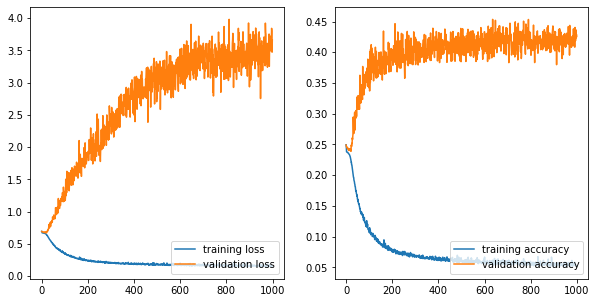

In [192]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')
axs[1].plot(hist.epoch, hist.history['mse'])
axs[1].plot(hist.epoch, hist.history['val_mse'])
axs[1].legend(('training accuracy','validation accuracy'), loc='lower right')
plt.show()

In [151]:
    mod = tf.keras.models.Sequential()
    mod.add(tf.keras.layers.Dense(57, input_dim=np.shape(train_x)[1], activation = 'relu'))
    #mod.add(tf.keras.Dropout(.5))
    mod.add(tf.keras.layers.Dense(12, activation = 'relu'))
    #mod.add(tf.keras.Dropout(.5))
    mod.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    mod.compile(loss = 'binary_crossentropy', optimizer =tf.keras.optimizers.Adam(learning_rate=0.001), 
                 metrics=['accuracy'])

In [152]:

mod.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 57)                3306      
_________________________________________________________________
dense_54 (Dense)             (None, 12)                696       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 13        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [153]:
hist =  mod.fit(x=train_x, y=train_y,
                  epochs=500, batch_size=20,
                  validation_data=(test_x, test_y))

Epoch 1/500
185/185 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6064 - val_loss: 0.6836 - val_accuracy: 0.5891
Epoch 2/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.6102 - val_loss: 0.6790 - val_accuracy: 0.5891
Epoch 3/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6102 - val_loss: 0.6784 - val_accuracy: 0.5891
Epoch 4/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.6104 - val_loss: 0.6848 - val_accuracy: 0.5891
Epoch 5/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6644 - accuracy: 0.6102 - val_loss: 0.6807 - val_accuracy: 0.5891
Epoch 6/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6102 - val_loss: 0.6848 - val_accuracy: 0.5891
Epoch 7/500
185/185 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6112 - val_loss: 0.6816 - val_accuracy: 0.5924

Epoch 58/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7281 - val_loss: 0.8297 - val_accuracy: 0.5348
Epoch 59/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7240 - val_loss: 0.8559 - val_accuracy: 0.5304
Epoch 60/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7177 - val_loss: 0.8041 - val_accuracy: 0.5739
Epoch 61/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.7245 - val_loss: 0.8402 - val_accuracy: 0.5630
Epoch 62/500
185/185 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7321 - val_loss: 0.8985 - val_accuracy: 0.5522
Epoch 63/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.7283 - val_loss: 0.8756 - val_accuracy: 0.5130
Epoch 64/500
185/185 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7267 - val_loss: 0.8373 - val_accuracy:

Epoch 115/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7821 - val_loss: 1.1296 - val_accuracy: 0.5293
Epoch 116/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7748 - val_loss: 1.0991 - val_accuracy: 0.5217
Epoch 117/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7816 - val_loss: 1.1225 - val_accuracy: 0.5054
Epoch 118/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7851 - val_loss: 1.0365 - val_accuracy: 0.5489
Epoch 119/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.7794 - val_loss: 1.0707 - val_accuracy: 0.5435
Epoch 120/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7756 - val_loss: 1.0946 - val_accuracy: 0.5500
Epoch 121/500
185/185 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7838 - val_loss: 1.0958 - val_ac

185/185 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8123 - val_loss: 1.2485 - val_accuracy: 0.5750
Epoch 172/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8036 - val_loss: 1.2553 - val_accuracy: 0.5337
Epoch 173/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8047 - val_loss: 1.3006 - val_accuracy: 0.5141
Epoch 174/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8074 - val_loss: 1.3026 - val_accuracy: 0.5283
Epoch 175/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8139 - val_loss: 1.2786 - val_accuracy: 0.5402
Epoch 176/500
185/185 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8131 - val_loss: 1.3946 - val_accuracy: 0.4457
Epoch 177/500
185/185 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.7982 - val_loss: 1.3244 - val_accuracy: 0.5348

185/185 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8259 - val_loss: 1.4264 - val_accuracy: 0.5380
Epoch 228/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8218 - val_loss: 1.3790 - val_accuracy: 0.5641
Epoch 229/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8218 - val_loss: 1.5393 - val_accuracy: 0.5413
Epoch 230/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8250 - val_loss: 1.4483 - val_accuracy: 0.5565
Epoch 231/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8272 - val_loss: 1.4944 - val_accuracy: 0.5283
Epoch 232/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8253 - val_loss: 1.5144 - val_accuracy: 0.5576
Epoch 233/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8256 - val_loss: 1.5433 - val_accuracy: 0.4783

185/185 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8449 - val_loss: 1.6475 - val_accuracy: 0.5522
Epoch 284/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8362 - val_loss: 1.6274 - val_accuracy: 0.5522
Epoch 285/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8318 - val_loss: 1.6916 - val_accuracy: 0.5315
Epoch 286/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8348 - val_loss: 1.7334 - val_accuracy: 0.4793
Epoch 287/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8392 - val_loss: 1.6963 - val_accuracy: 0.5446
Epoch 288/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8411 - val_loss: 1.6662 - val_accuracy: 0.5228
Epoch 289/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8375 - val_loss: 1.6129 - val_accuracy: 0.5533

185/185 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8354 - val_loss: 1.6801 - val_accuracy: 0.5609
Epoch 340/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.8495 - val_loss: 1.6979 - val_accuracy: 0.5457
Epoch 341/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8473 - val_loss: 1.8597 - val_accuracy: 0.5283
Epoch 342/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8473 - val_loss: 1.7933 - val_accuracy: 0.5446
Epoch 343/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8405 - val_loss: 1.8851 - val_accuracy: 0.5174
Epoch 344/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3141 - accuracy: 0.8490 - val_loss: 1.7496 - val_accuracy: 0.5478
Epoch 345/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8498 - val_loss: 1.7983 - val_accuracy: 0.5478

185/185 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8495 - val_loss: 2.0567 - val_accuracy: 0.5380
Epoch 396/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8566 - val_loss: 2.0774 - val_accuracy: 0.5391
Epoch 397/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8457 - val_loss: 1.9726 - val_accuracy: 0.5511
Epoch 398/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8552 - val_loss: 1.9516 - val_accuracy: 0.5511
Epoch 399/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8438 - val_loss: 1.9194 - val_accuracy: 0.5457
Epoch 400/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8517 - val_loss: 2.0820 - val_accuracy: 0.5152
Epoch 401/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8411 - val_loss: 1.9723 - val_accuracy: 0.5370

185/185 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8579 - val_loss: 2.1558 - val_accuracy: 0.5380
Epoch 452/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8650 - val_loss: 2.0891 - val_accuracy: 0.5522
Epoch 453/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8585 - val_loss: 2.1335 - val_accuracy: 0.5380
Epoch 454/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8669 - val_loss: 2.0841 - val_accuracy: 0.5109
Epoch 455/500
185/185 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8416 - val_loss: 2.1443 - val_accuracy: 0.5380
Epoch 456/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8631 - val_loss: 2.1757 - val_accuracy: 0.5489
Epoch 457/500
185/185 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8574 - val_loss: 2.1816 - val_accuracy: 0.5326